# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
#import citypy
#python -m  pip
#pip install citipy 
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + "a8f9db15e3493be999d1937e91313fd2"

In [50]:
# Set the API base URL
# YOUR CODE HERE

#url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atherton
{'coord': {'lon': -2.4935, 'lat': 53.5237}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.25, 'feels_like': 3.25, 'temp_min': 0.75, 'temp_max': 5.58, 'pressure': 1032, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 1, 'gust': 0.89}, 'clouds': {'all': 6}, 'dt': 1706649230, 'sys': {'type': 2, 'id': 2001932, 'country': 'GB', 'sunrise': 1706601577, 'sunset': 1706633192}, 'timezone': 0, 'id': 2656847, 'name': 'Atherton', 'cod': 200}
Processing Record 2 of Set 1 | albany
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.99, 'feels_like': -0.99, 'temp_min': -2.37, 'temp_max': 0.29, 'pressure': 1020, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 14

In [51]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df = pd.DataFrame(city_data)

city_data_df = pd.DataFrame.from_dict(city_data)
# YOUR CODE HERE
#output_data_file = "output_data/cities.csv"

#city_data_df.to_csv(output_data_file, index_label="City_ID")

#city_data_df.count()
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atherton,53.5237,-2.4935,5.58,5.58,6,0.45,GB,1706649230
1,albany,42.6001,-73.9662,0.29,0.29,100,0.45,US,1706649008
2,arraial do cabo,-22.9661,-42.0278,26.92,26.92,75,3.60,BR,1706649230
3,whitehorse,60.7161,-135.0538,2.95,2.95,63,7.15,CA,1706649231
4,port elizabeth,-33.9180,25.5701,22.40,22.40,0,1.03,ZA,1706649231


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atherton,53.5237,-2.4935,5.58,5.58,6,0.45,GB,1706649230
1,albany,42.6001,-73.9662,0.29,0.29,100,0.45,US,1706649008
2,arraial do cabo,-22.9661,-42.0278,26.92,26.92,75,3.60,BR,1706649230
3,whitehorse,60.7161,-135.0538,2.95,2.95,63,7.15,CA,1706649231
4,port elizabeth,-33.9180,25.5701,22.40,22.40,0,1.03,ZA,1706649231


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

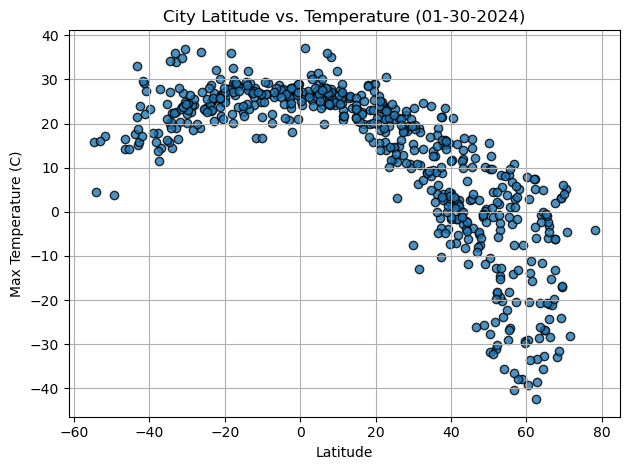

In [57]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
from datetime import datetime
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

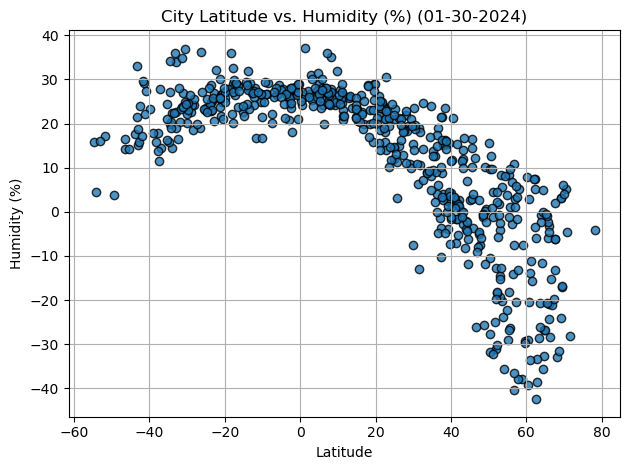

In [58]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

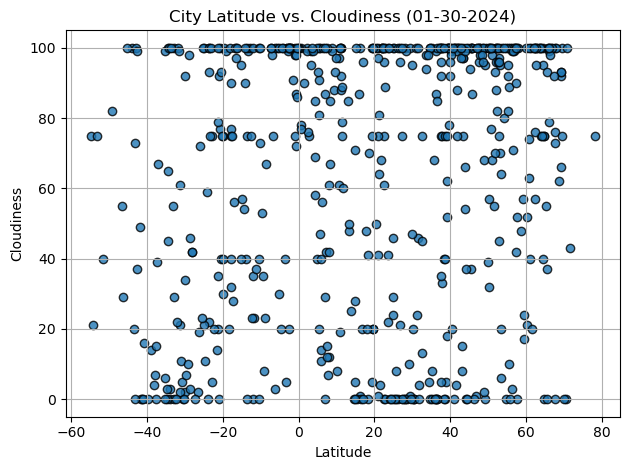

In [59]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

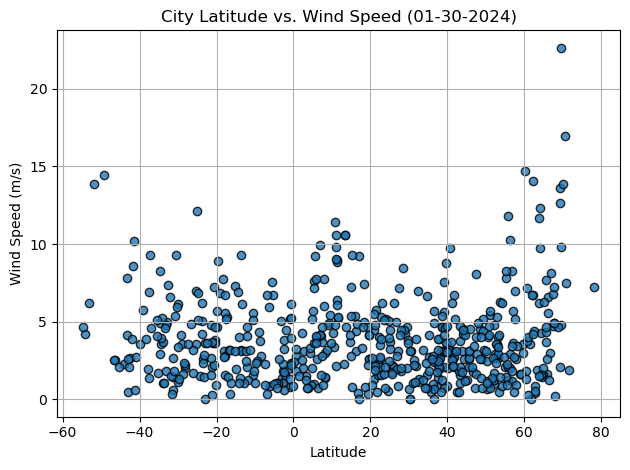

In [60]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atherton,53.5237,-2.4935,5.58,5.58,6,0.45,GB,1706649230
1,albany,42.6001,-73.9662,0.29,0.29,100,0.45,US,1706649008
3,whitehorse,60.7161,-135.0538,2.95,2.95,63,7.15,CA,1706649231
7,bethel,41.3712,-73.4140,2.20,2.20,100,2.57,US,1706649231
10,dali,25.7000,100.1833,3.14,3.14,0,2.19,CN,1706649231


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arraial do cabo,-22.9661,-42.0278,26.92,26.92,75,3.60,BR,1706649230
4,port elizabeth,-33.9180,25.5701,22.40,22.40,0,1.03,ZA,1706649231
5,adamstown,-25.0660,-130.1015,23.47,23.47,100,12.14,PN,1706649231
6,minas de marcona,-15.2119,-75.1103,22.73,22.73,95,7.31,PE,1706649231
8,port-aux-francais,-49.3500,70.2167,3.82,3.82,82,14.47,TF,1706649231


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8151120666693402


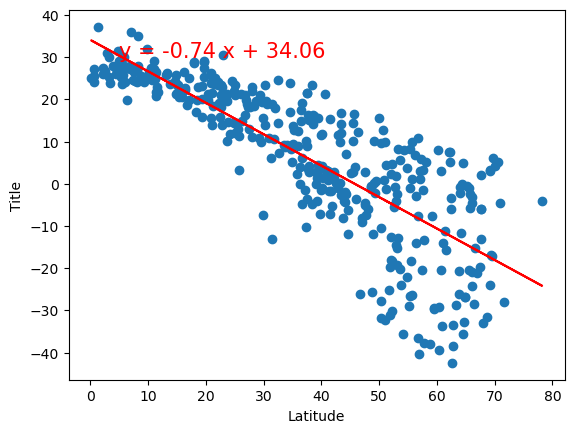

In [71]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_axis = northern_hemi_df ["Lat"]
y_axis = northern_hemi_df ["Max Temp"]

plot_linear_regression(x_axis, y_axis, 'Max Temp', (5, 30))

The r-squared is: 0.4500205490822776


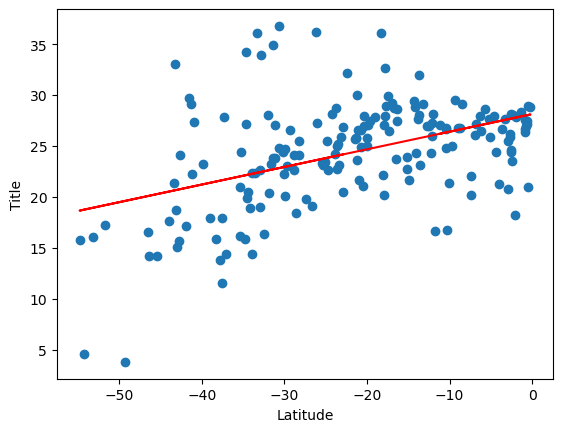

In [73]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_axis_s = southern_hemi_df ["Lat"]
y_axis_s = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_axis_s, y_axis_s, 'Max Temp', (-30, 40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the Northern hemisphere, Temperature vs. Latitude has a negative correlation. For the Southern hemisphere,
#this is the opposite (positive correlation).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.8151120666693402


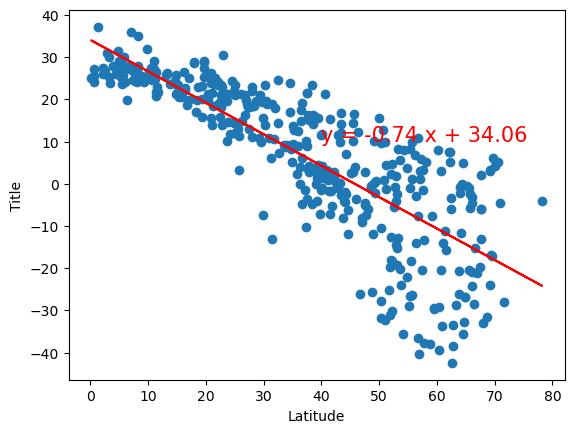

In [74]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_hum = northern_hemi_df ["Lat"]
y_axis_hum = northern_hemi_df ["Humidity"]

plot_linear_regression(x_axis_hum, y_axis_hum, 'Humidity', (40, 10))

The r-squared is: 0.4500205490822776


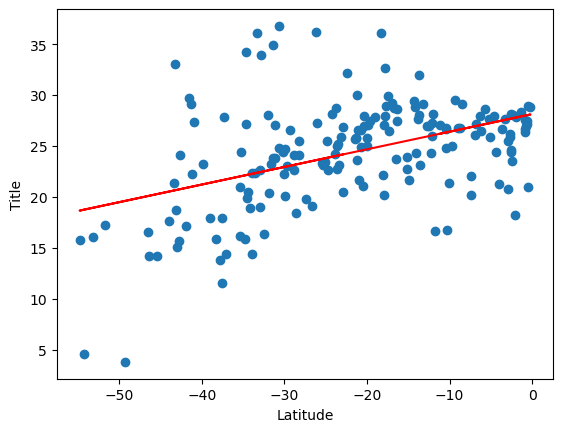

In [78]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_hum_s = southern_hemi_df ["Lat"]
y_axis_hum_s = southern_hemi_df ["Humidity"]

plot_linear_regression(x_axis_hum_s, y_axis_hum_s, 'Humidity', (-20, 150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the Northern hemisphere, Humidity vs. Latitude has a negative correlation.
#For the Southern hemisphere the oppoisote is true: Humidity vs. Latitude has a positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13729449599099888


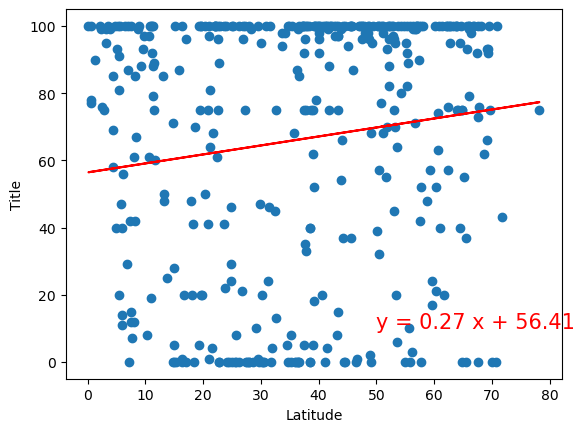

In [79]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_clo = northern_hemi_df ["Lat"]
y_axis_clo = northern_hemi_df ["Cloudiness"]

plot_linear_regression(x_axis_clo, y_axis_clo, 'Cloudiness', (50, 10))

The r-squared is: 0.3550737182444315


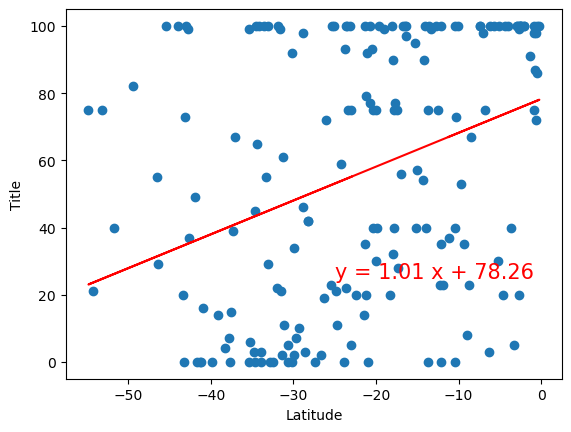

In [80]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_clo_s = southern_hemi_df ["Lat"]
y_axis_clo_s = southern_hemi_df ["Cloudiness"]

plot_linear_regression(x_axis_clo_s, y_axis_clo_s, 'Cloudiness', (-25, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For both the Northern and Southern hemospheres, Cloudiness vs. Latitude has a positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.09027906905956921


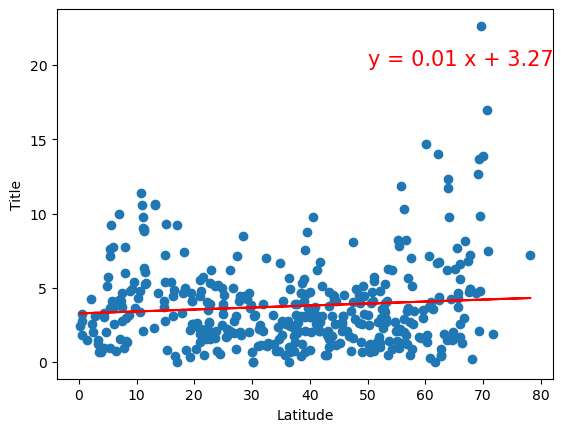

In [82]:
# Northern Hemisphere
# YOUR CODE HERE

x_wind = northern_hemi_df ["Lat"]
y_wind = northern_hemi_df ["Wind Speed"]

plot_linear_regression(x_wind ,y_wind, 'Wind Speed', (50,20))

The r-squared is: -0.2516313244272992


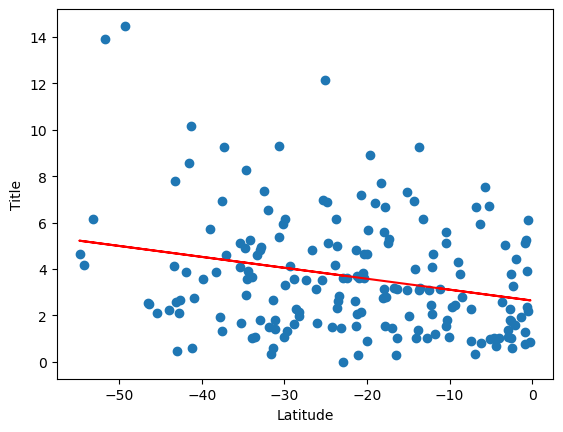

In [83]:
# Southern Hemisphere
# YOUR CODE HERE

x_wind_s = southern_hemi_df ["Lat"]
y_wind_s = southern_hemi_df ["Wind Speed"]

plot_linear_regression(x_wind_s, y_wind_s, 'Wind Speed', (-40, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the Northern hemisphere, there is virtually no relationship between Wind Speed vs. Latitude.
#For the Southern hemisphere, there is a negative relationship between Wind Speed vs. Latitude. 